In [1]:
import pandas as pd
import numpy as np
# read the txt file and change the datatype
Cancer_file = pd.read_csv('/Users/mgh/MGH/CE/waterloo/ECE 657A/Assignment/hw1.txt', encoding = "utf-8",sep=',', 
                names = ["ID", "Clump_Thickness", "U_Cell_Size", "U_Cell_Shape",'Marginal_Adhesion',
                    'Single_E_CellSize','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class'])
Cancer_file['ID']=Cancer_file['ID'].astype(str)
Cancer_file['Class']=Cancer_file['Class'].astype(str)
# a test (can be deleted after)
Cancer_file[0:10]

,ID,Clump_Thickness,U_Cell_Size,U_Cell_Shape,Marginal_Adhesion,Single_E_CellSize,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [2]:
# replace the missing value '?' with mean
Cancer_file[Cancer_file['Bare_Nuclei'] != '?']=Cancer_file[Cancer_file['Bare_Nuclei']!= '?'].astype(int)
Cancer_file[Cancer_file['Bare_Nuclei'] == '?']=Cancer_file[Cancer_file['Bare_Nuclei'] == '?'].replace('?',np.nan)
Bare_N_Mean=int(Cancer_file['Bare_Nuclei'].mean(skipna=True))
Cancer_file['Bare_Nuclei']=Cancer_file['Bare_Nuclei'].fillna(Bare_N_Mean)

# Question 1:

In [3]:
#report the mean, mode and skew, standard deviation 
#and variance values for all the continuous valued features.

print('-------------------------------mean-----------------------------------')
print(Cancer_file.mean())

print('-------------------------------mode-----------------------------------')
print(Cancer_file.iloc[:,1:10].mode().transpose())

print('-------------------------------skew-----------------------------------')
print(Cancer_file.iloc[:,1:10].skew().transpose())

print('-------------------------------std------------------------------------')
print(Cancer_file.std())

print('-----------------------------variance---------------------------------')
print(Cancer_file.var())

-------------------------------mean-----------------------------------
Clump_Thickness      4.417740
U_Cell_Size          3.134478
U_Cell_Shape         3.207439
Marginal_Adhesion    2.806867
Single_E_CellSize    3.216023
Bare_Nuclei          3.532189
Bland_Chromatin      3.437768
Normal_Nucleoli      2.866953
Mitoses              1.589413
dtype: float64
-------------------------------mode-----------------------------------
                   0
Clump_Thickness    1
U_Cell_Size        1
U_Cell_Shape       1
Marginal_Adhesion  1
Single_E_CellSize  2
Bare_Nuclei        1
Bland_Chromatin    2
Normal_Nucleoli    1
Mitoses            1
-------------------------------skew-----------------------------------
Clump_Thickness      0.592859
U_Cell_Size          1.233137
U_Cell_Shape         1.161859
Marginal_Adhesion    1.524468
Single_E_CellSize    1.712172
Bare_Nuclei          1.011057
Bland_Chromatin      1.099969
Normal_Nucleoli      1.422261
Mitoses              3.560658
dtype: float64
-------

In [4]:
Cancer_file.describe()

,Clump_Thickness,U_Cell_Size,U_Cell_Shape,Marginal_Adhesion,Single_E_CellSize,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.532189,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.602774,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
col_names =  ["mean", "mode", "skew",'std','variance']

#calculate the mean, mode, skew and standard deviation 
#only for all the continuous valued features
stats= pd.DataFrame(columns = col_names)
stats["mean"]=Cancer_file.mean()
stats["mode"]=Cancer_file.iloc[:,1:10].mode().transpose()
stats["skew"]=Cancer_file.iloc[:,1:10].skew().transpose()
stats["std"]=Cancer_file.std()
stats['variance']=Cancer_file.var()

In [6]:
# print mean, mode, skew, standard deviation and variance
stats

,mean,mode,skew,std,variance
Clump_Thickness,4.417740,1,0.592859,2.815741,7.928395
U_Cell_Size,3.134478,1,1.233137,3.051459,9.311403
U_Cell_Shape,3.207439,1,1.161859,2.971913,8.832265
Marginal_Adhesion,2.806867,1,1.524468,2.855379,8.153191
Single_E_CellSize,3.216023,2,1.712172,2.214300,4.903124
Bare_Nuclei,3.532189,1,1.011057,3.602774,12.979980
Bland_Chromatin,3.437768,2,1.099969,2.438364,5.945620
Normal_Nucleoli,2.866953,1,1.422261,3.053634,9.324680
Mitoses,1.589413,1,3.560658,1.715078,2.941492


# Question 2:

In [7]:
#2. a few pairs of features for correlation by computing their PCC 
#and report the resulting numbers and explain what they mean
from pandas import *
import numpy as np

from scipy.stats.stats import pearsonr
import itertools

NewFrame = pd.DataFrame()
columns=['Clump_Thickness', 'U_Cell_Size', 'U_Cell_Shape',
       'Marginal_Adhesion', 'Single_E_CellSize', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']

correlations = {}
for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = pearsonr(Cancer_file.loc[:, col_a], Cancer_file.loc[:, col_b])
NewFrame = DataFrame.from_dict(correlations, orient='index')
NewFrame.columns = ['PCC', 'p-value']
AnswerFrame = NewFrame.iloc[:,0]


print(AnswerFrame.sort_index())

Bare_Nuclei__Bland_Chromatin            0.676167
Bare_Nuclei__Mitoses                    0.339844
Bare_Nuclei__Normal_Nucleoli            0.577347
Bland_Chromatin__Mitoses                0.344169
Bland_Chromatin__Normal_Nucleoli        0.665878
Clump_Thickness__Bare_Nuclei            0.588433
Clump_Thickness__Bland_Chromatin        0.558428
Clump_Thickness__Marginal_Adhesion      0.486356
Clump_Thickness__Mitoses                0.350034
Clump_Thickness__Normal_Nucleoli        0.535835
Clump_Thickness__Single_E_CellSize      0.521816
Clump_Thickness__U_Cell_Shape           0.654589
Clump_Thickness__U_Cell_Size            0.644913
Marginal_Adhesion__Bare_Nuclei          0.666086
Marginal_Adhesion__Bland_Chromatin      0.666715
Marginal_Adhesion__Mitoses              0.417633
Marginal_Adhesion__Normal_Nucleoli      0.603352
Marginal_Adhesion__Single_E_CellSize    0.599599
Normal_Nucleoli__Mitoses                0.428336
Single_E_CellSize__Bare_Nuclei          0.582331
Single_E_CellSize__B

# Question 3:

In [8]:
#3. plot two histograms for Clum Thickness of your choice: 
#One for patients with each diagnosis (M or B).


Cancer_file['Class']=Cancer_file['Class'].astype(str)

# M is represented by class 2 and 
df_B=Cancer_file[Cancer_file['Class']=='2']
df_M=Cancer_file[Cancer_file['Class']=='4']

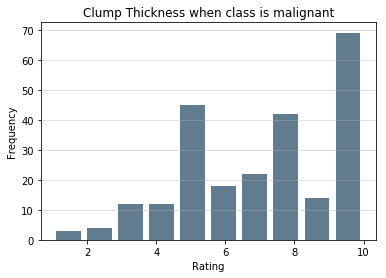

In [11]:
import matplotlib.pyplot as plt

df_M['Clump_Thickness'].plot.hist(rwidth=0.8,color='#607c8e')
plt.title('Clump Thickness when class is malignant')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

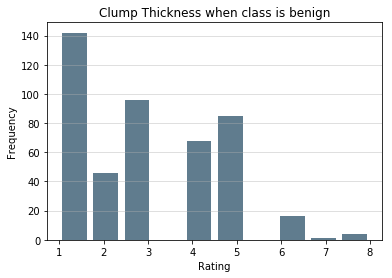

In [10]:

df_B['Clump_Thickness'].plot.hist(rwidth=0.8,color='#607c8e')
plt.title('Clump Thickness when class is benign')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()